In [119]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
exp_dir = '../exp/v1'
results = {'modality':[], 'emb_type':[], 'idx_src':[], 'idx_tgt':[], 'epoch':[], 'loss':[], 'acc':[]}

for modality in ['text', 'image']:
    for emb_type in ['nn', 'normal']:
        for idx_src in range(0,4):
            for idx_tgt in range(0,4):
                if idx_src != idx_tgt:
                    log_dir = os.path.join(exp_dir, f'{emb_type}_{modality}_{idx_src}-{emb_type}_{modality}_{idx_tgt}')
                    with open(os.path.join(log_dir, 'logger.log'), 'r') as r:
                        prev = None
                        for line in r.readlines():
                            if 'epoch' in line:
                                epoch = float(line.split()[3].split(':')[1][:-1])           
                                loss = float(line.split()[5].split(':')[1])
                                acc = float(line.split()[-1])
                                
                                if prev != acc:
                                    results['modality'].append(modality)
                                    results['emb_type'].append(emb_type)
                                    results['idx_src'].append(idx_src)
                                    results['idx_tgt'].append(idx_tgt)
                                    results['epoch'].append(epoch)
                                    results['loss'].append(loss)
                                    results['acc'].append(acc)
                                    prev = acc

df = pd.DataFrame(results)

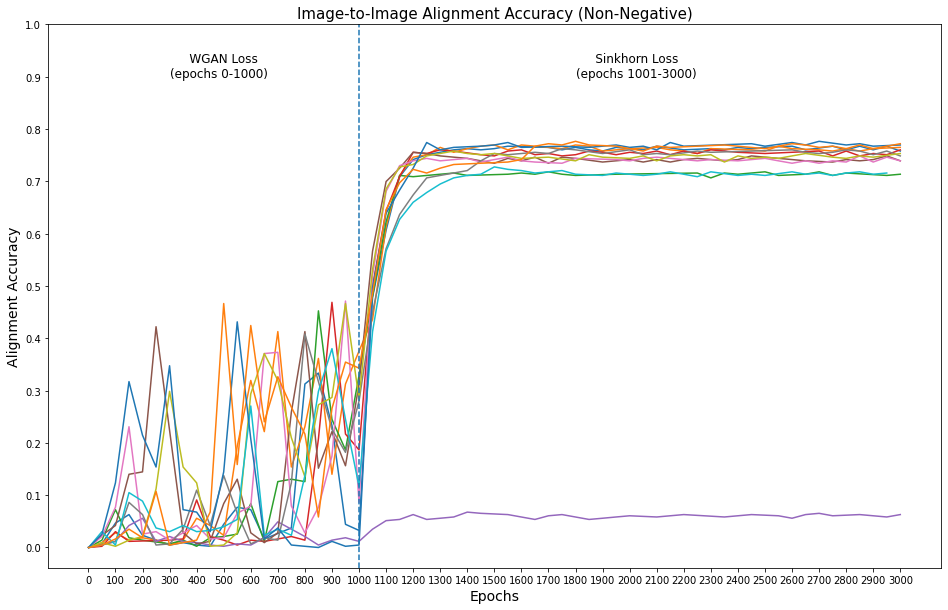

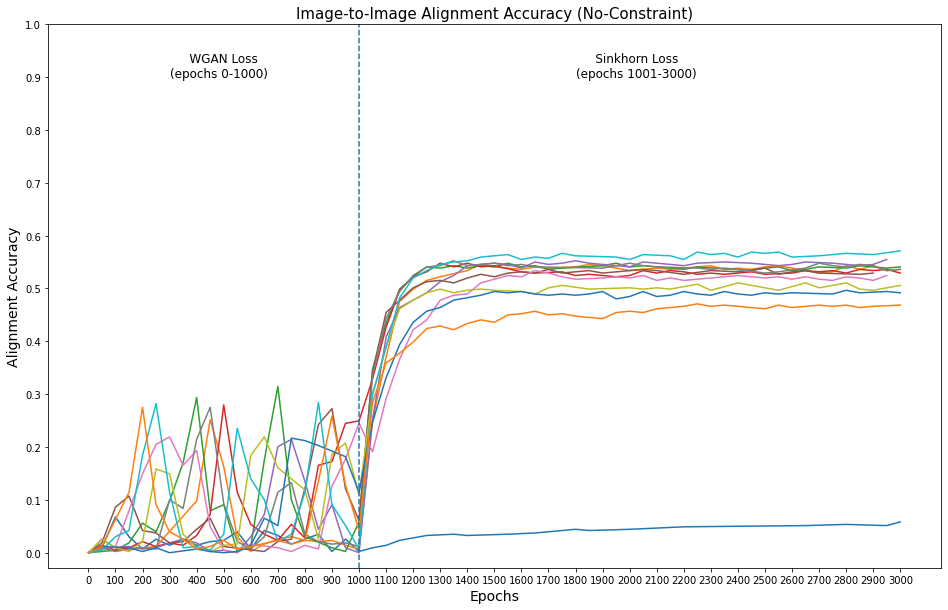

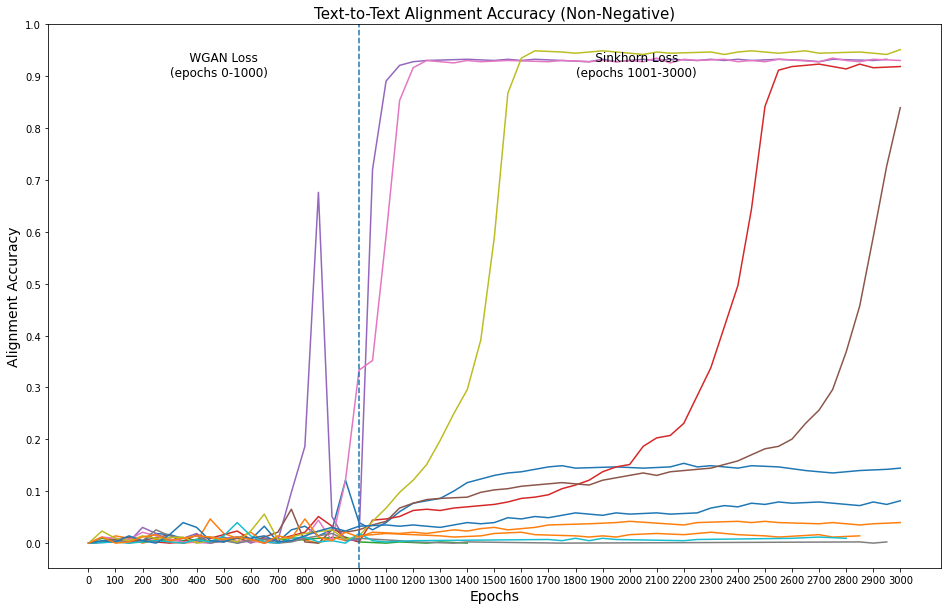

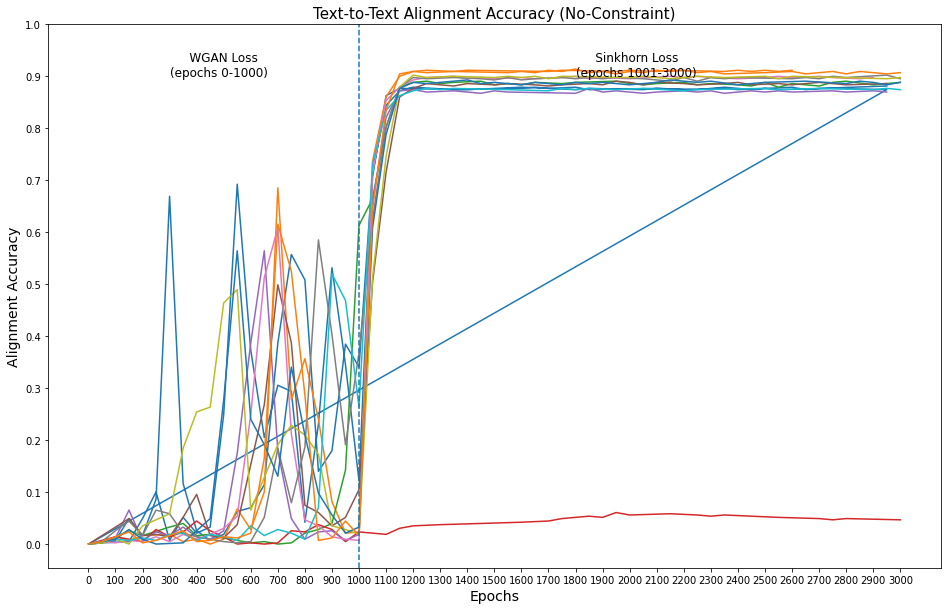

In [204]:
for modality in ['image','text']:
    for emb_type in ['nn', 'normal']:
        plt.figure(figsize=(16,10))
        for idx_src in range(0,4):
            for idx_tgt in range(0,4):
                if idx_src != idx_tgt:
                    df_plot = df.loc[(df['idx_src']==idx_src) & (df['idx_tgt']==idx_tgt) & (df['modality']==modality) & (df['emb_type']==emb_type)]
                    plt.plot(df_plot['epoch'], df_plot['acc'])


        title_prefix = 'Image-to-Image' if modality=='image' else 'Text-to-Text'
        title_suffix = '(Non-Negative)' if emb_type=='nn' else '(No-Constraint)'
        title_main = 'Alignment Accuracy'

        plt.title(f'{title_prefix} {title_main} {title_suffix}', fontsize=15)

        plt.text(300,0.90,'     WGAN Loss \n(epochs 0-1000)',fontsize=12)
        plt.text(1800,0.90,'     Sinkhorn Loss  \n(epochs 1001-3000)',fontsize=12)
        plt.axvline(x=1000, ls='--')
        plt.xticks(np.arange(0, 3001, 100))
        plt.xlabel('Epochs', fontsize=14)
        plt.ylabel('Alignment Accuracy', fontsize=14)
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.show()